#unzipping the files

In [ ]:
!unzip /content/drive/MyDrive/Ml_datsets/Bioimaging_1/A0.3.zip -d /content/drive/MyDrive/Ml_datsets/Bioimaging_1/0.3

Archive:  /content/drive/MyDrive/Ml_datsets/Bioimaging_1/A0.3.zip
replace /content/drive/MyDrive/Ml_datsets/Bioimaging_1/0.3/A0.3/103064_0.3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip /content/drive/MyDrive/Ml_datsets/Bioimaging_1/A0.7.zip -d /content/drive/MyDrive/Ml_datsets/Bioimaging_1/0.7

#importing libraries

In [286]:
import zipfile

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [287]:
import torch
import numpy as np
import cv2
import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os 
import re 
from scipy import ndimage, misc 
from tqdm import tqdm

from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import img_to_array
from keras import layers
from tensorflow.keras.utils import plot_model

# uploading the dataset

In [8]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

In [293]:
SIZE = 256
high_img = []
path = '../content/drive/MyDrive/Ml_datsets/Bioimaging_1/0.7/A0.7'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == '855.jpg':
        break
    else:    
        img = cv2.imread(path + '/'+i,0)
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))

100%|██████████| 5165/5165 [00:43<00:00, 120.08it/s]


In [294]:
low_img = []
path = '../content/drive/MyDrive/Ml_datsets/Bioimaging_1/0.3/A0.3'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '855.jpg':
        break
    else: 
        img = cv2.imread(path + '/'+i,9)
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        low_img.append(img_to_array(img))

100%|██████████| 5165/5165 [00:40<00:00, 127.46it/s]


#plotting the dataset

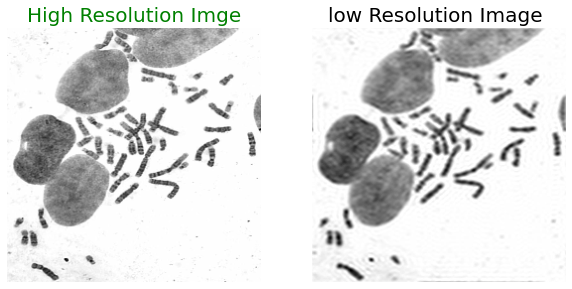

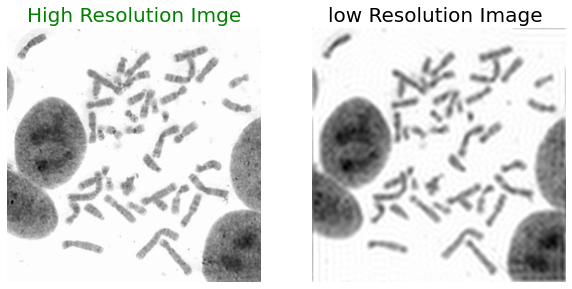

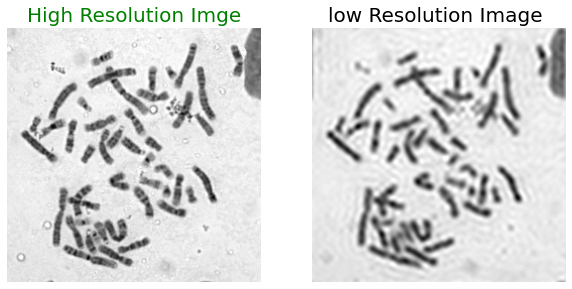

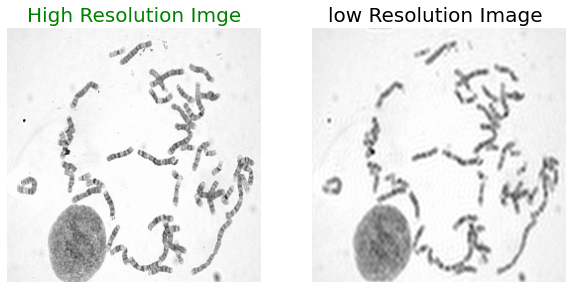

In [281]:
for i in range(4):
    a = np.random.randint(0,5165)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(high_img[a],cmap="gray")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a],cmap="gray")
    plt.axis('off')

In [39]:
train_high_image = high_img[:4132]
train_low_image = low_img[:4132]
validation_high_image = high_img[4132:4648]
validation_low_image = low_img[4132:4648]
test_high_image = high_img[4648:]
test_low_image = low_img[4648:]

In [ ]:
train_high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,1))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,1))
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE,SIZE,1))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,1))
test_high_image= np.reshape(test_high_image,(len(test_high_image),SIZE,SIZE,1))
test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,1))

In [282]:
print("Shape of training images:",train_high_image.shape)

Shape of training images: (4132, 256, 256, 1)


In [283]:
print("Shape of validation images:",validation_high_image.shape)

Shape of validation images: (516, 256, 256, 1)


In [284]:
print("Shape of test images:",test_high_image.shape)

Shape of test images: (517, 256, 256, 1)


#defining the architecture of model

In [ ]:
def pixel_mse_loss(x,y):
    return tf.reduce_mean( (x - y) ** 2 )

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 64)      5248      
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      2080      
                                                                 
 conv2d_11 (Conv2D)          (None, 256, 256, 3)       2403      
                                                                 
Total params: 9,731
Trainable params: 9,731
Non-trainable params: 0
_________________________________________________________________


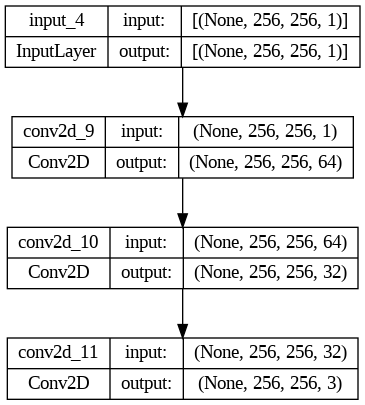

In [290]:
input_img=Input(shape=(256,256,1))
l1=tf.keras.layers.Conv2D(64,9,padding='same',activation='relu') (input_img)
l2=tf.keras.layers.Conv2D(32,1,padding='same',activation='relu') (l1)
l3=tf.keras.layers.Conv2D(3,5,padding='same',activation='relu') (l2)

SRCNN=Model(input_img,l3)

SRCNN.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=pixel_mse_loss)
SRCNN.summary()
plot_model(SRCNN, to_file ='super_res.png',show_shapes=True)

#training the model

In [44]:
SRCNN.fit(train_low_image, train_high_image, epochs = 2, batch_size = 1,validation_data = (validation_low_image,validation_high_image))

Epoch 1/2
4132/4132 [==============================] - 2872s 695ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 2/2
4132/4132 [==============================] - 2794s 676ms/step - loss: 0.0013 - val_loss: 0.0013


# Metrics(PSNR and Pixel loss) and plotting functions

In [291]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

In [ ]:
def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

In [ ]:
def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

In [292]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high, cmap='gray')
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low,  cmap='gray')
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted, cmap='gray')
    plt.show()

1/1 [==============================] - 0s 117ms/step


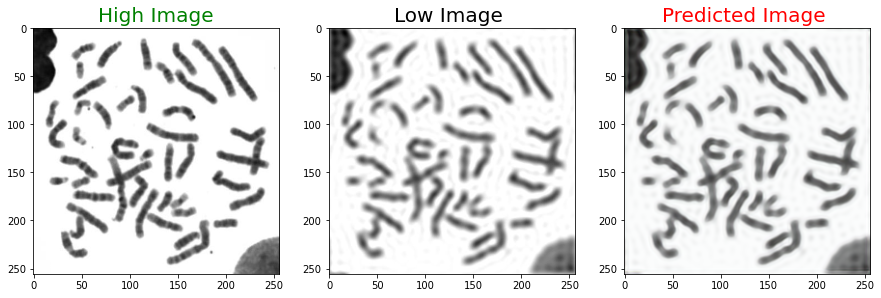

PSNR= 26.389082 dB
 SSIM= 0.9013675
1/1 [==============================] - 0s 118ms/step


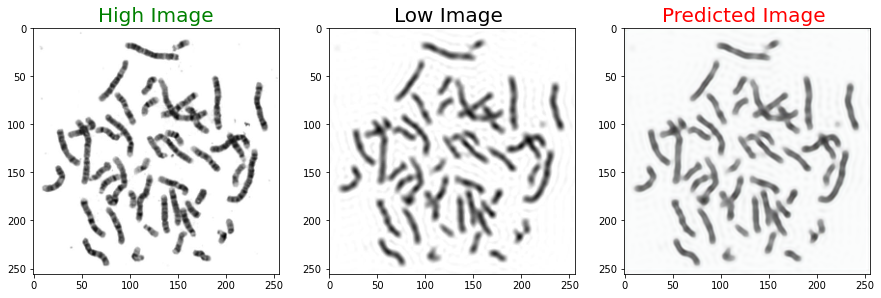

PSNR= 28.04177 dB
 SSIM= 0.93962026
1/1 [==============================] - 0s 193ms/step


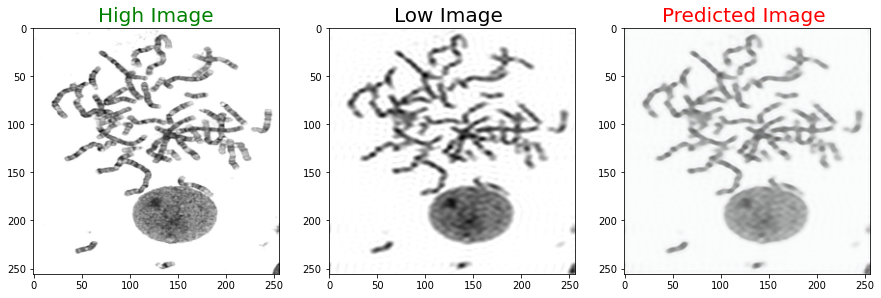

PSNR= 28.744402 dB
 SSIM= 0.91740876
1/1 [==============================] - 0s 205ms/step


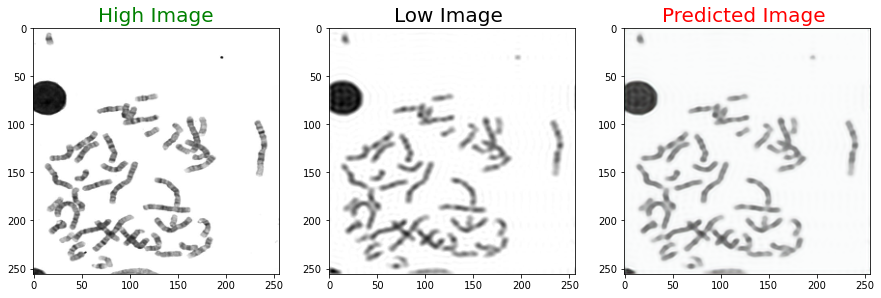

PSNR= 29.631645 dB
 SSIM= 0.9543721
1/1 [==============================] - 0s 116ms/step


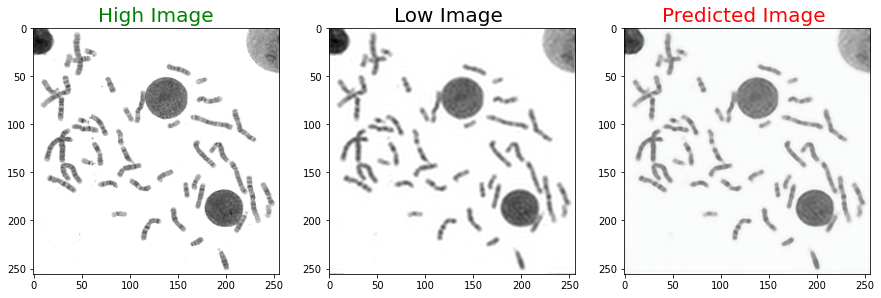

PSNR= 31.034702 dB
 SSIM= 0.95494413
1/1 [==============================] - 0s 96ms/step


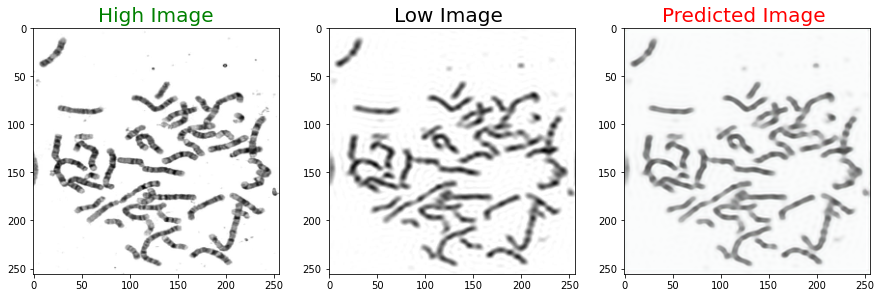

PSNR= 27.977983 dB
 SSIM= 0.9387017
1/1 [==============================] - 0s 98ms/step


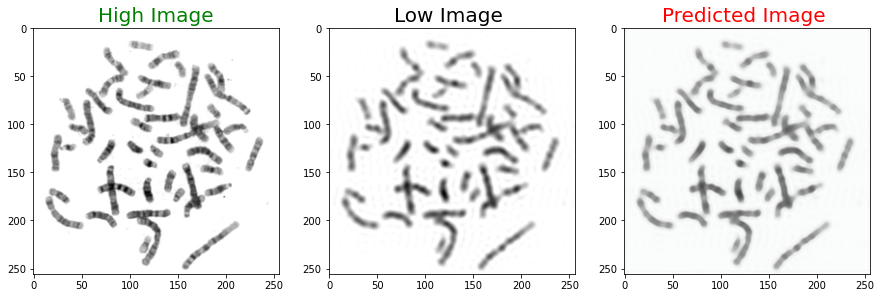

PSNR= 30.213402 dB
 SSIM= 0.9494967
1/1 [==============================] - 0s 96ms/step


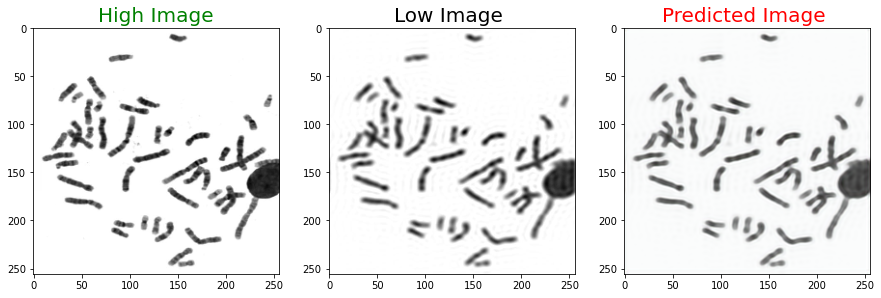

PSNR= 30.162102 dB
 SSIM= 0.9698677
1/1 [==============================] - 0s 206ms/step


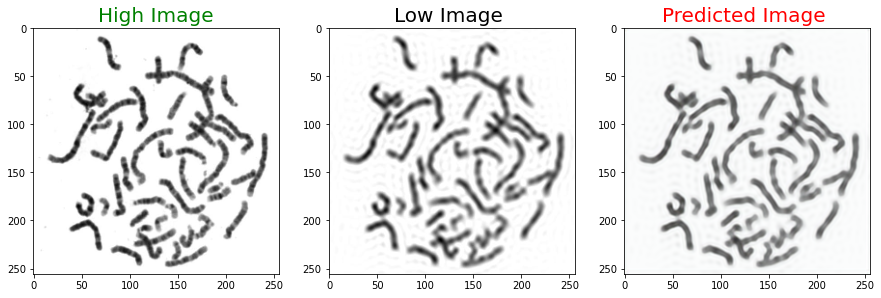

PSNR= 27.137714 dB
 SSIM= 0.93459576
1/1 [==============================] - 0s 201ms/step


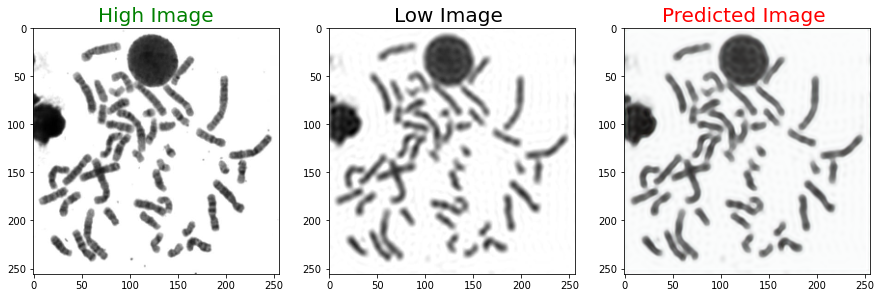

PSNR= 28.221031 dB
 SSIM= 0.92941034
1/1 [==============================] - 0s 105ms/step


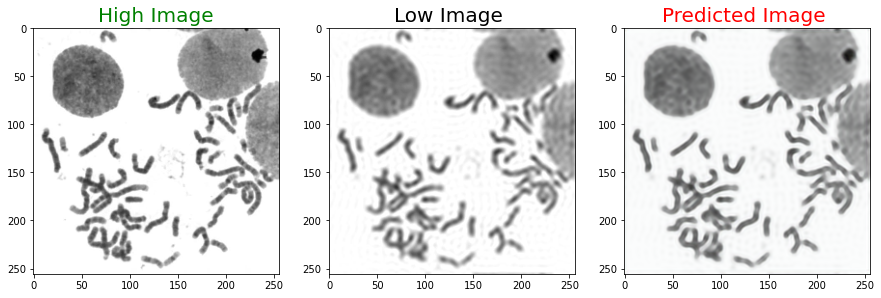

PSNR= 27.984589 dB
 SSIM= 0.8923468


In [297]:
for i in range(14,25):
    
    predicted = np.clip(SRCNN.predict(test_low_image[i].reshape(1,SIZE, SIZE,1)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_high_image[i],test_low_image[i],predicted)
    predicted = tf.image.rgb_to_grayscale(predicted)

    print('PSNR=',PSNR(test_high_image[i],predicted).numpy(),'dB\n' ,"SSIM=",tf.image.ssim(test_high_image[i],predicted,max_val=1).numpy())

# Saving the model

In [88]:
from tensorflow.keras.models import load_model
from tensorflow import keras
from keras.models import load_model

In [99]:
SRCNN.save("Bio1.h5")